# Task 1 Fake News Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data =  pd.read_csv("fake_or_real_news.csv")

In [4]:
data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#Replacinfg the fake and real by 0 and 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [6]:
data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


# EDA

In [7]:
data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [8]:
data['label'].value_counts()

1    3171
0    3164
Name: label, dtype: int64

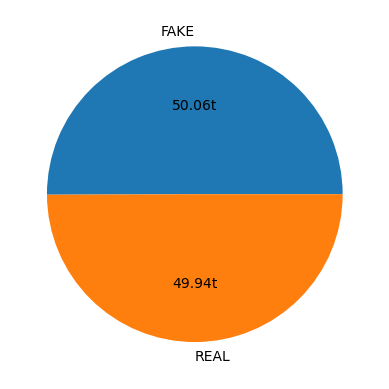

In [9]:
plt.pie(data['label'].value_counts(),labels=['FAKE',"REAL"],autopct="%0.2ft")
plt.show()

In [10]:
import nltk

In [11]:
data['num_characters']=data['text'].apply(len)

In [12]:
data.head()

,id,title,text,label,num_characters
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,1840


In [13]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
data.head()

,id,title,text,label,num_characters,num_words
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,7518,1473
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,2646,516
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,2543,484
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,2660,498
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,1840,376


In [15]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
data.head()

,id,title,text,label,num_characters,num_words,num_sentences
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,7518,1473,87
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,2646,516,24
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,2543,484,16
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,2660,498,17
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,1840,376,21


In [17]:
data[['num_characters','num_words','num_sentences']]

,num_characters,num_words,num_sentences
0,7518,1473,87
1,2646,516,24
2,2543,484,16
3,2660,498,17
4,1840,376,21
...,...,...,...
6330,4076,726,27
6331,14323,2594,49
6332,11974,2137,100
6333,6991,1313,40


<Axes: xlabel='num_characters', ylabel='Count'>

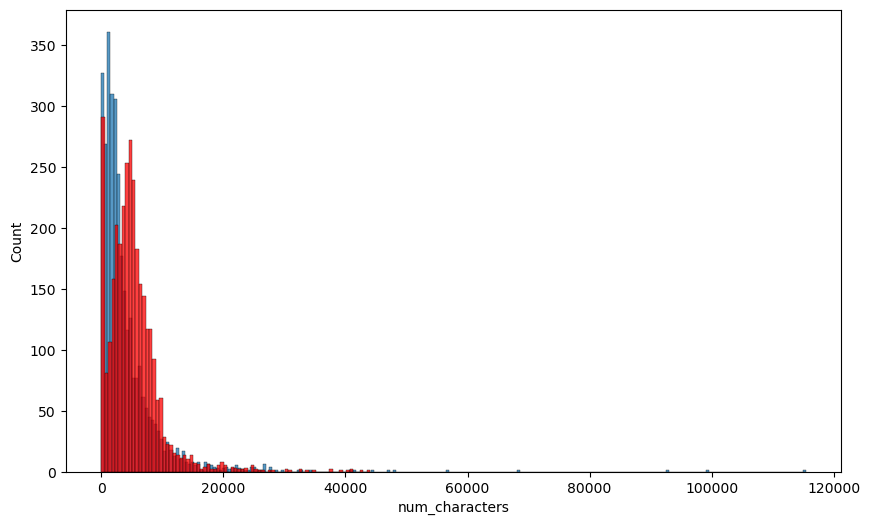

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['label']==0]['num_characters'])
sns.histplot(data[data['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

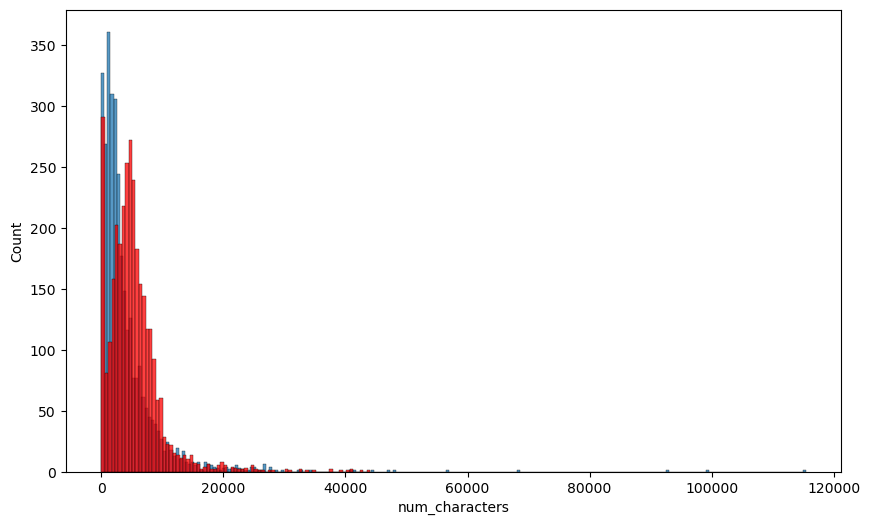

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['label']==0]['num_characters'])
sns.histplot(data[data['label']==1]['num_characters'],color='red')

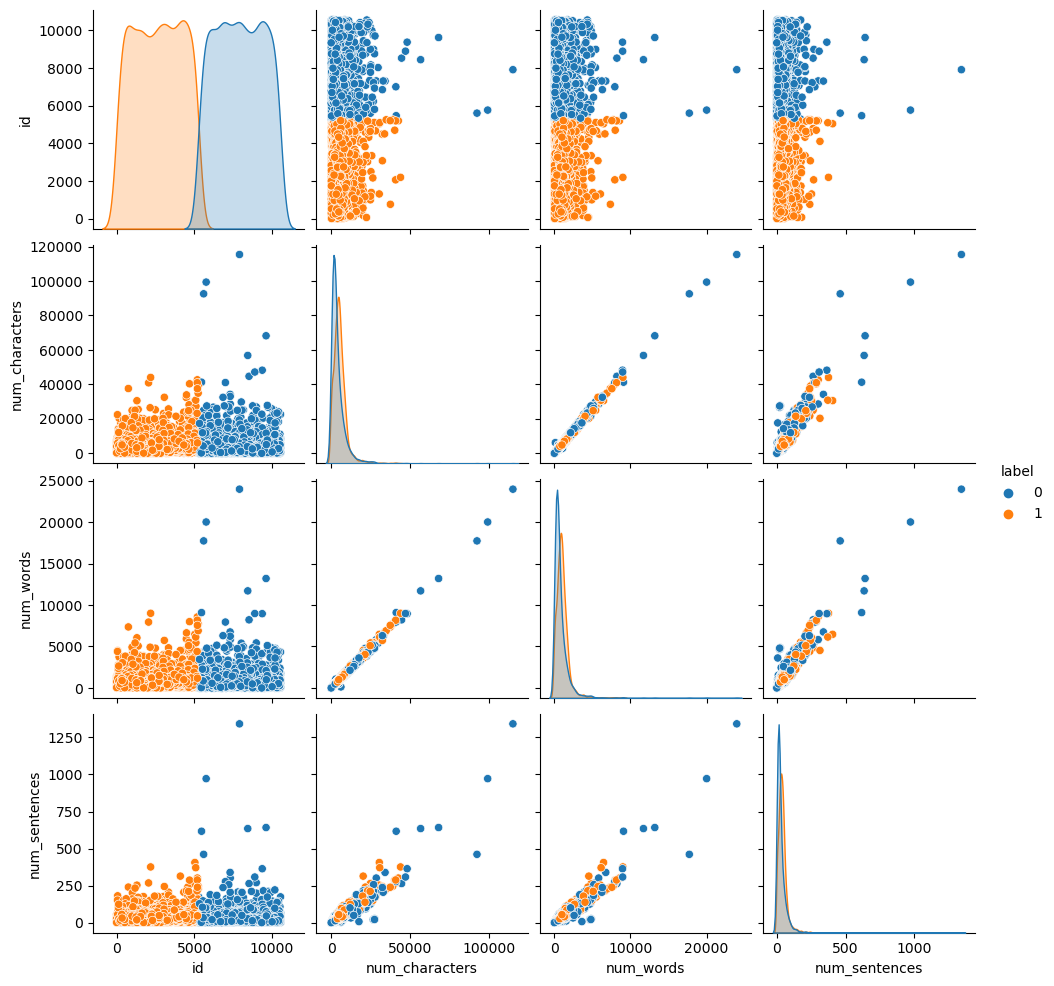

In [20]:
sns.pairplot(data,hue='label')

C:\Users\jayesh\AppData\Local\Temp\ipykernel_24776\1732092068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='GnBu')


<Axes: >

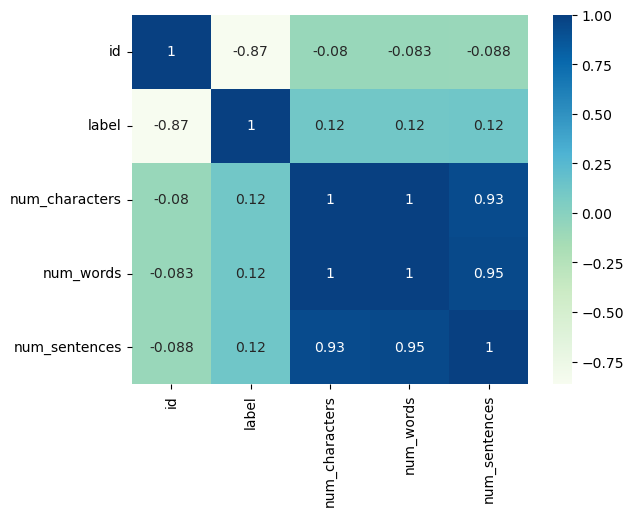

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='GnBu')

# Data processing

In [22]:
# transformimg the text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [24]:
fake_wc = wc.generate(data[data['label']==1]['text'].str.cat(sep=""))

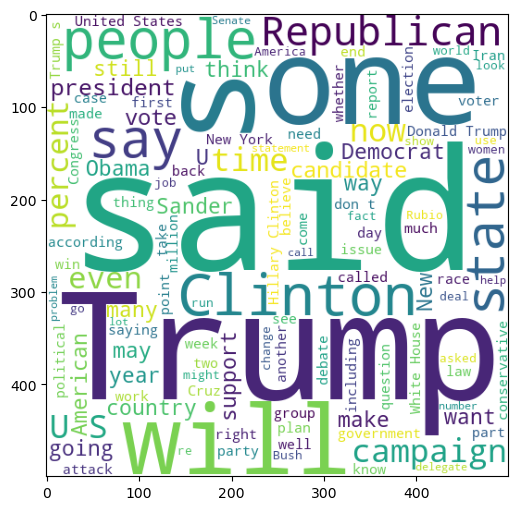

In [26]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

In [27]:
real_wc = wc.generate(data[data['label']==0]['text'].str.cat(sep=""))

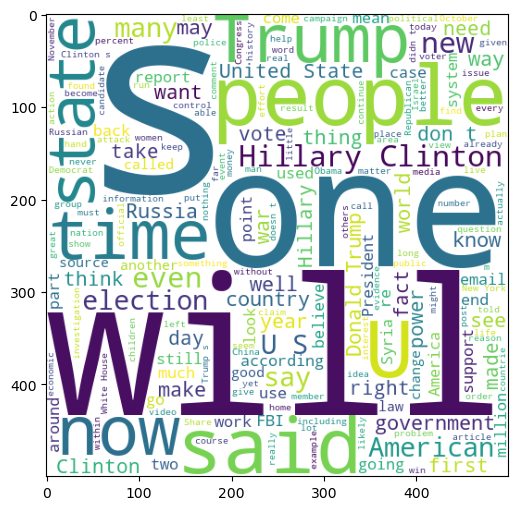

In [28]:
plt.figure(figsize=(15,6))
plt.imshow(real_wc)

In [29]:
fake_corpus = []
for m in data[data['label']==1]['text'].tolist():
    for word in m.split():
        fake_corpus.append(word)

In [30]:
len(fake_corpus)

2769100

<Axes: xlabel='0', ylabel='1'>

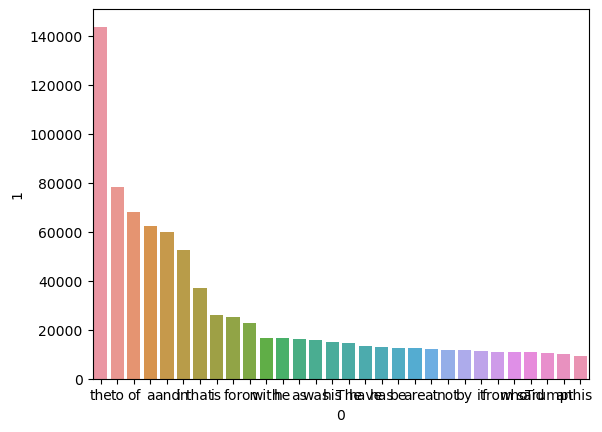

In [32]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(fake_corpus).most_common(30))[0],y=pd.DataFrame(Counter(fake_corpus).most_common(30))[1])

In [33]:
real_corpus=[]
for m in data[data['label']==0]['text'].tolist():
    for word in m.split():
        real_corpus.append(word)

In [34]:
len(real_corpus)

2148765

<Axes: xlabel='0', ylabel='1'>

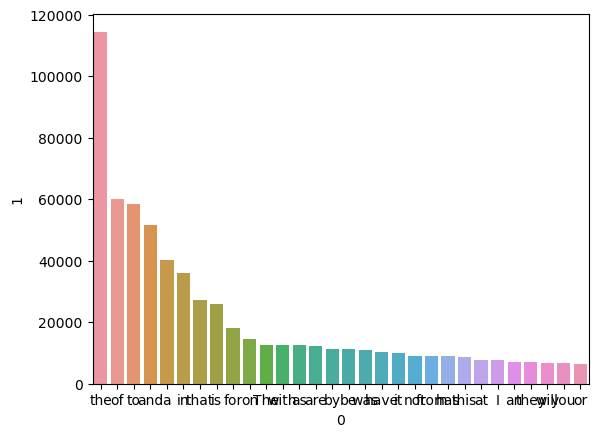

In [35]:
sns.barplot(x=pd.DataFrame(Counter(real_corpus).most_common(30))[0],y=pd.DataFrame(Counter(real_corpus).most_common(30))[1])

In [36]:
data.head(10)

,id,title,text,label,num_characters,num_words,num_sentences
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,7518,1473,87
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,2646,516,24
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,2543,484,16
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,2660,498,17
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,1840,376,21
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",0,13333,2708,97
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",0,3171,644,18
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,1,783,143,5
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,1,13863,2789,79
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,1,4296,773,32


# Model Bulding

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
TF = TfidfVectorizer(max_features=3000)

In [43]:
x=TF.fit_transform(data['text']).toarray()

In [45]:
x.shape

(6335, 3000)

In [47]:
y=data['label'].values

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred =LR.predict(x_test)

In [54]:
# importing the matrix labaries
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("Classification Report : \n",classification_report(y_pred,y_test))
print("-----------------------------------------------------------\n")

Confusion matrix : 
 [[844  82]
 [ 89 886]]
Accuracy score :  0.9100473435034192
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       926
           1       0.92      0.91      0.91       975

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

-----------------------------------------------------------

